In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [9]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()) )

In [10]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [36]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

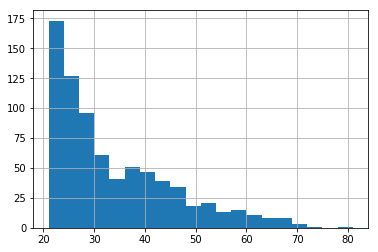

In [13]:
diabetes['Age'].hist(bins=20)

In [15]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [16]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [17]:
# TRAIN TEST SPLIT

In [18]:
x_data = diabetes.drop('Class',axis = 1)

In [19]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
labels = diabetes['Class']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size = 0.3,random_state = 101)

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y = y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_model_dir': '/var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmp1nvw880i', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}


In [25]:
model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmp1nvw880i/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 229.243
INFO:tensorflow:step = 101, loss = 5.12482 (0.438 sec)
INFO:tensorflow:global_step/sec: 253.822
INFO:tensorflow:step = 201, loss = 6.26343 (0.393 sec)
INFO:tensorflow:global_step/sec: 221.657
INFO:tensorflow:step = 301, loss = 6.79553 (0.457 sec)
INFO:tensorflow:global_step/sec: 235.889
INFO:tensorflow:step = 401, loss = 6.96568 (0.418 sec)
INFO:tensorflow:global_step/sec: 244.194
INFO:tensorflow:step = 501, loss = 5.03018 (0.409 sec)
INFO:tensorflow:global_step/sec: 230.988
INFO:tensorflow:step = 601, loss = 5.90479 (0.433 sec)
INFO:tensorflow:global_step/sec: 211.246
INFO:tensorflow:step = 701, loss = 5.31665 (0.481 sec)
INFO:tensorflow:global_step/sec: 232.559
INFO:tensorflow:step = 801, loss = 6.98989 (0.428 sec)
INFO:tensorflow:global_step/

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs=1, shuffle=False)

In [27]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-24-09:30:28
INFO:tensorflow:Restoring parameters from /var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmp1nvw880i/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-24-09:30:30
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.792798, auc_precision_recall = 0.643094, average_loss = 0.53192, global_step = 1000, label/mean = 0.350649, loss = 5.11973, prediction/mean = 0.374997


In [28]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7927984,
 'auc_precision_recall': 0.64309442,
 'average_loss': 0.53192037,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1197338,
 'prediction/mean': 0.37499705}

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size = 10, num_epochs=1, shuffle=False)

In [30]:
preditions = model.predict(pred_input_func)

In [31]:
my_pred = list(preditions)

INFO:tensorflow:Restoring parameters from /var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmp1nvw880i/model.ckpt-1000


In [32]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.52464509], dtype=float32),
  'logits': array([ 0.09866035], dtype=float32),
  'probabilities': array([ 0.47535488,  0.52464509], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.62916857], dtype=float32),
  'logits': array([ 0.52865171], dtype=float32),
  'probabilities': array([ 0.3708314 ,  0.62916857], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.42739895], dtype=float32),
  'logits': array([-0.29247129], dtype=float32),
  'probabilities': array([ 0.57260102,  0.42739895], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.30520341], dtype=float32),
  'logits': array([-0.82264066], dtype=float32),
  'probabilities': array([ 0.69479662,  0.30520344], dtype=float32)},
 {'class_ids': array([0]),
  'classes': arra

In [34]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_model_dir': '/var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmpfm1ks9kj', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}


In [37]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension = 4)

In [38]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket, embedded_group_col]

In [39]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [48]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10,20,20],feature_columns=feat_cols,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_model_dir': '/var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmpjhzaev6l', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}


In [53]:
dnn_model.train(input_fn = input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmpjhzaev6l/model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into /var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmpjhzaev6l/model.ckpt.
INFO:tensorflow:step = 1001, loss = 4.21467
INFO:tensorflow:global_step/sec: 208.452
INFO:tensorflow:step = 1101, loss = 3.32271 (0.481 sec)
INFO:tensorflow:global_step/sec: 229.68
INFO:tensorflow:step = 1201, loss = 5.35085 (0.436 sec)
INFO:tensorflow:global_step/sec: 217.668
INFO:tensorflow:step = 1301, loss = 2.79336 (0.458 sec)
INFO:tensorflow:global_step/sec: 225.98
INFO:tensorflow:step = 1401, loss = 2.61955 (0.445 sec)
INFO:tensorflow:global_step/sec: 225.64
INFO:tensorflow:step = 1501, loss = 6.87107 (0.441 sec)
INFO:tensorflow:global_step/sec: 225.499
INFO:tensorflow:step = 1601, loss = 3.91109 (0.444 sec)
INFO:tensorflow:global_step/sec: 250.081
INFO:tensorflow:step = 1701, loss = 2.42477 (0.399 

In [55]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y = y_test, batch_size=10,num_epochs=1, shuffle = False)

In [56]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-24-09:45:21
INFO:tensorflow:Restoring parameters from /var/folders/f1/nnt7c4mn2rv2jhd9lpbk0g4w0000gp/T/tmpjhzaev6l/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2017-12-24-09:45:23
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.757576, accuracy_baseline = 0.649351, auc = 0.808313, auc_precision_recall = 0.680209, average_loss = 0.551762, global_step = 2000, label/mean = 0.350649, loss = 5.31071, prediction/mean = 0.339377


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80831271,
 'auc_precision_recall': 0.68020928,
 'average_loss': 0.55176198,
 'global_step': 2000,
 'label/mean': 0.35064936,
 'loss': 5.3107095,
 'prediction/mean': 0.33937722}